In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Load the data

In [12]:
data = pd.read_csv('data/breast_cancer.csv')

In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
y = data.diagnosis                          
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Note on standardization and normalization:
---

## 1. Standardization:
![](resources/std.jpg)
![](resources/standardization.png)

## Standardization solves distribution mean and standard deviation shift of different features
## Why do we care? 
## -> It removes model bias because values lie in the same range

![](resources/std.png)

## 2. Normalization:
## Rescales all your points into a range between 0 - 1
## Why do we care? 
## -> Safes computation time, puts features on the same scale
![](resources/normalization.jpg)


### For more information and mathematical background for why it's important please read: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

# Selecting Features

## 1. Step: Check correlation between labels and input features | The higher the better the feature can be used as a predictor
- Swarmplot: Draw a categorical scatterplot
- doc: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

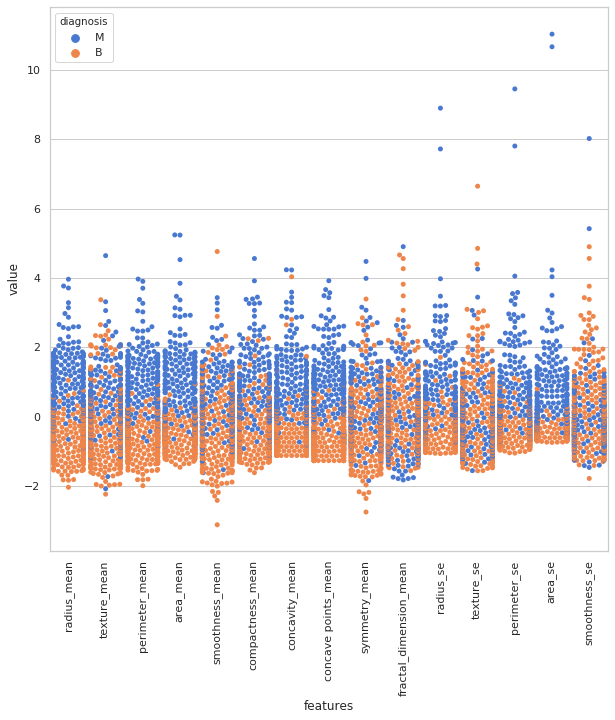

In [15]:
sns.set(style="whitegrid", palette="muted")

# Standardizing
standardized_data = (x - x.mean()) / (x.std())

concat_data = pd.concat([y, standardized_data.iloc[:,0:15]], axis=1)

concat_data = pd.melt(concat_data, id_vars="diagnosis",
                      var_name="features",
                      value_name='value')

plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=concat_data)
plt.xticks(rotation=90)
plt.show()

## Here good features would be:
- area_mean, concave_points_mean, area_se

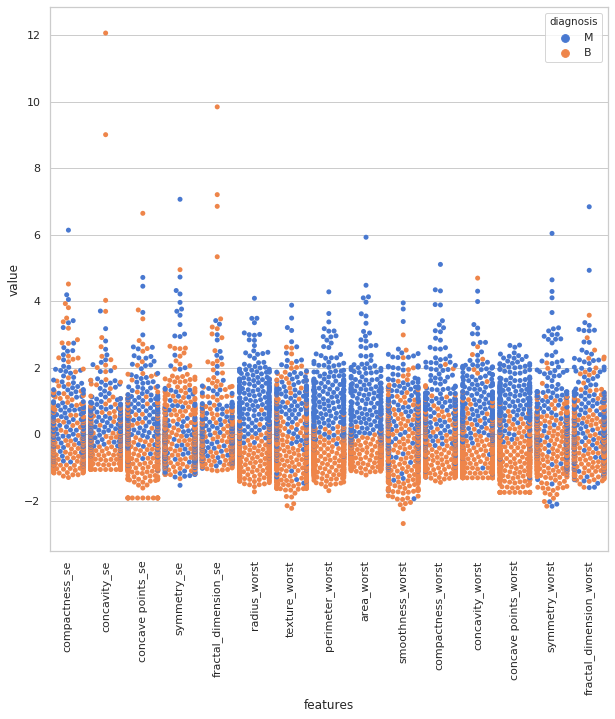

In [16]:
sns.set(style="whitegrid", palette="muted")

standardized_data = (x - x.mean()) / (x.std())

concat_data = pd.concat([y, standardized_data.iloc[:,15:]], axis=1)

concat_data = pd.melt(concat_data, id_vars="diagnosis",
                      var_name="features",
                      value_name='value')

plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=concat_data)
plt.xticks(rotation=90)
plt.show()

## Here are some good features(correlated with the label):
- area mean, concavity mean, area_se, area_worst

## 2. Step: Check correlation between features | keep only uncorrelated features

#### Features:
1. Radius_mean, perimeter_mean and area_mean are correlated -> Look closer onto area_mean. Does it correlate with the label ? If so keep it!

2. Compactness_mean, concavity_mean and concave points_mean are correlated with each other -> Look closer onto concavity_mean. Does it correlate with the label ? If so keep it!

3. radius_se, perimeter_se and area_se are correlated -> Look closer onto area_se. Does it correlate with the label ? If so keep it!

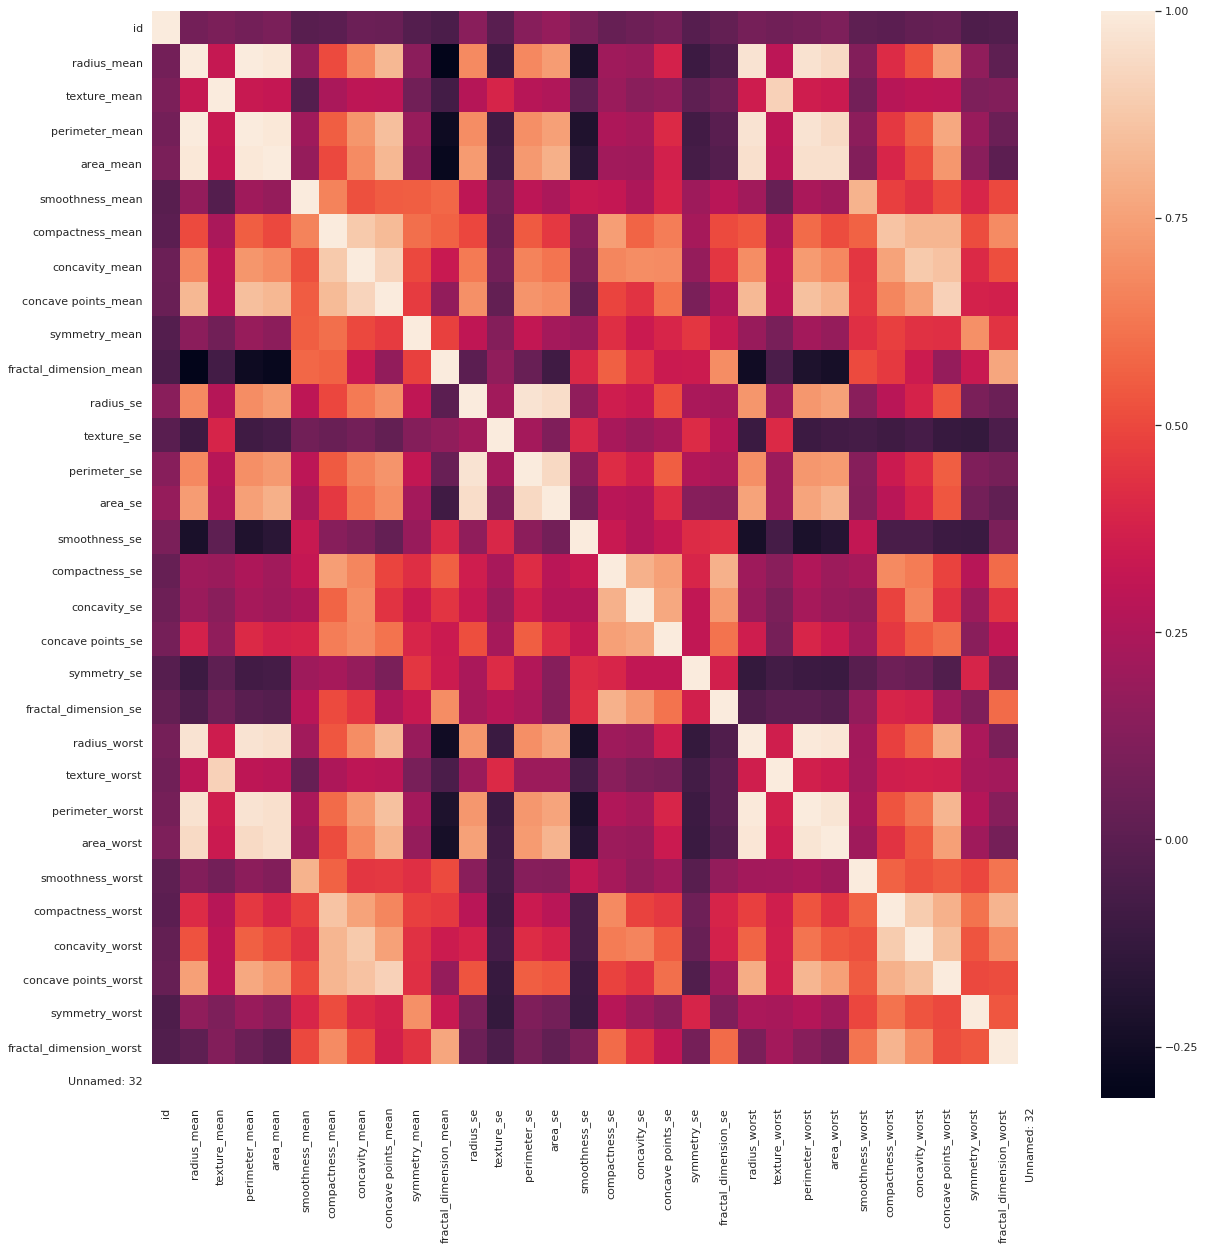

In [23]:
plt.figure(figsize=(20,20)) 

sns.heatmap(data.corr())

plt.show()

### Finally check if features they correlate with each other

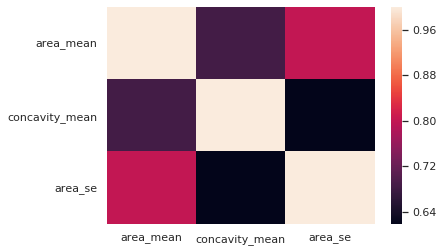

In [24]:
sns.heatmap(data[['area_mean', 'concavity_mean', 'area_se']].corr())

## 3. Step: Use only the selected features and drop the rest

In [25]:
final_data = data[['area_mean', 'concavity_mean', 'area_se']]
final_data.head()

,area_mean,concavity_mean,area_se
0,1001.0,0.3001,153.40
1,1326.0,0.0869,74.08
2,1203.0,0.1974,94.03
3,386.1,0.2414,27.23
4,1297.0,0.1980,94.44
